
<center>

# Challenge itti 2025

</center>

<center>

<br>
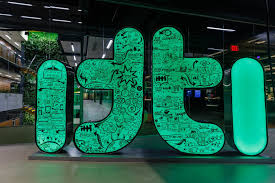
</center>


# 1 - Ejercicio de Prompt Engineering para un bot de consultas de una fintech

## Objetivo
Diseñar un prompt unificado aplicando tecnicas de in-context learning que oriente al modelo a responder consultas de clientes de forma clara, precisa y empática, demostrando además su proceso de razonamiento. La fintech ofrece como productos **tarjetas de débito**, **tarjetas de crédito** y **préstamos**. Evaluaremos el uso y entendimiento de las diferentes tecnicas avanzadas de prompting

---


## Entregables

- **Prompt Unificado:**  
  Documento que contenga el prompt que propones para la solución. Incluir cual fue el modelo con el cual realizaste la prueba.

- **Documentación:**  
  Explicación de las tecnicas usadas y su respectiva justificacion de porque se usaron. Es valida la explicacion del porque ciertas tecnicas no fueron usadas.

- **Evals(Basicas):**

  Pequeño dataset (entre 5 y 10 ejemplos) que evidencien el funcionamiento y desempeño del prompt creado. Calcular métricas de desempeño utilizando el dataset creado que apunten a que la solución es confiable y genera valor de negocio. Nota: Importante enviar codigo que permita replicar el calculo de métricas de forma independiente.
- **Ejemplos de Salidas:**  

  Simulaciones o capturas de pantalla demostrando el funcionamiento del prompt en distintos escenarios.


  

In [ ]:
import json
import re
from typing import Dict, List, Tuple
import pandas as pd

# Dataset de evaluación
evaluation_dataset = [
    {
        "id": 1,
        "input": "¿Cuál es el límite de mi tarjeta de crédito?",
        "category": "tarjeta_credito",
        "complexity": "media",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["límite", "tarjeta de crédito", "scoring", "verificar"],
        "requires_clarification": True
    },
    {
        "id": 2,
        "input": "¿Cuánto me cobran?",
        "category": "general",
        "complexity": "alta",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["productos", "específico", "tarjeta de débito", "tarjeta de crédito", "préstamos"],
        "requires_clarification": True
    },
    {
        "id": 3,
        "input": "Necesito un préstamo de $100,000",
        "category": "prestamo",
        "complexity": "media",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["préstamo", "$100,000", "tasa", "plazo", "pago mensual"],
        "requires_clarification": False
    },
    {
        "id": 4,
        "input": "Mi tarjeta de débito no funciona",
        "category": "tarjeta_debito",
        "complexity": "alta",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["tarjeta de débito", "problema", "solución"],
        "requires_clarification": True
    },
    {
        "id": 5,
        "input": "¿Qué documentos necesito para la tarjeta de crédito?",
        "category": "tarjeta_credito",
        "complexity": "baja",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["documentos", "tarjeta de crédito", "requisitos"],
        "requires_clarification": False
    },
    {
        "id": 6,
        "input": "¿Puedo pagar mi préstamo antes?",
        "category": "prestamo",
        "complexity": "media",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["préstamo", "pago anticipado", "prepago"],
        "requires_clarification": False
    },
    {
        "id": 7,
        "input": "Estoy muy molesto, me cobraron algo que no entiendo",
        "category": "queja",
        "complexity": "alta",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["entiendo", "frustración", "ayuda", "específico"],
        "requires_clarification": True
    },
    {
        "id": 8,
        "input": "¿Cuánto puedo retirar con mi tarjeta de débito?",
        "category": "tarjeta_debito",
        "complexity": "baja",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["tarjeta de débito", "retirar", "límite"],
        "requires_clarification": False
    },
    {
        "id": 9,
        "input": "¿Qué pasa si no pago mi tarjeta de crédito?",
        "category": "tarjeta_credito",
        "complexity": "alta",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["tarjeta de crédito", "pago", "consecuencias"],
        "requires_clarification": False
    },
    {
        "id": 10,
        "input": "Hola",
        "category": "saludo",
        "complexity": "baja",
        "expected_components": ["analysis", "response", "details", "next_step"],
        "expected_keywords": ["ayuda", "productos", "servicios"],
        "requires_clarification": True
    }
]

print("Dataset de evaluación creado con", len(evaluation_dataset), "casos de prueba")
print("\nDistribución por categoría:")
categories = {}
for item in evaluation_dataset:
    cat = item["category"]
    categories[cat] = categories.get(cat, 0) + 1

for cat, count in categories.items():
    print(f"  {cat}: {count} casos")

# Mostrar algunos ejemplos
print("\nEjemplos del dataset:")
for i, example in enumerate(evaluation_dataset[:3]):
    print(f"\nCaso {i+1}:")
    print(f"  Input: {example['input']}")
    print(f"  Categoría: {example['category']}")
    print(f"  Complejidad: {example['complexity']}")
    print(f"  Requiere aclaración: {example['requires_clarification']}")


In [ ]:
# Respuestas simuladas del modelo (en un caso real, estas vendrían del modelo)
simulated_responses = [
    # Caso 1: Límite tarjeta de crédito
    """🤔 **Análisis:** El cliente pregunta sobre el límite de su tarjeta de crédito. Para proporcionar información precisa, necesito verificar su información personal ya que los límites varían según el perfil crediticio.
💡 **Respuesta:** Para consultar el límite exacto de tu tarjeta de crédito, necesito verificar tu información personal de forma segura.
📋 **Detalles:** Los límites de tarjeta de crédito se asignan según tu scoring crediticio y pueden variar entre $10,000 y $200,000. Nuestra tarjeta de crédito tiene una cuota anual de $2,500.
🔄 **Siguiente paso:** Por favor proporciona los últimos 4 dígitos de tu tarjeta y tu número de identificación para proceder con la consulta.""",
    
    # Caso 2: Consulta general
    """🤔 **Análisis:** La consulta es muy general y podría referirse a cualquiera de nuestros productos financieros. Necesito aclaración específica para brindar información precisa.
💡 **Respuesta:** Para ayudarte mejor, necesito saber a qué producto específico te refieres.
📋 **Detalles:** Nuestros productos tienen diferentes costos:
- Tarjeta de débito: Sin cuota anual
- Tarjeta de crédito: $2,500 anuales
- Préstamos: Tasa desde 18% anual
🔄 **Siguiente paso:** ¿Podrías especificar si preguntas sobre tarjeta de débito, tarjeta de crédito o préstamos?""",
    
    # Caso 3: Préstamo específico
    """🤔 **Análisis:** El cliente solicita información sobre un préstamo específico de $100,000. Este monto está dentro de nuestro rango disponible (hasta $500,000).
💡 **Respuesta:** ¡Perfecto! Podemos ayudarte con un préstamo de $100,000.
📋 **Detalles:** 
- Monto: $100,000 (disponible)
- Tasa: Desde 18% anual (según tu perfil crediticio)
- Plazo: Hasta 60 meses
- Pago mensual estimado: $2,500-$3,000
🔄 **Siguiente paso:** ¿Te gustaría iniciar el proceso de solicitud o necesitas más información sobre términos y condiciones?""",
    
    # Caso 4: Problema tarjeta débito
    """🤔 **Análisis:** El cliente reporta un problema con su tarjeta de débito. Esto requiere atención inmediata para resolver el inconveniente.
💡 **Respuesta:** Lamento que tengas problemas con tu tarjeta de débito. Te ayudo a solucionarlo de inmediato.
📋 **Detalles:** Los problemas comunes incluyen bloqueos por seguridad, exceder límites diarios, o fallas técnicas temporales.
🔄 **Siguiente paso:** ¿Podrías decirme qué mensaje específico aparece cuando intentas usar la tarjeta? Esto me ayudará a identificar la causa exacta.""",
    
    # Caso 5: Documentos tarjeta crédito
    """🤔 **Análisis:** El cliente pregunta sobre los documentos necesarios para obtener una tarjeta de crédito. Esta es información estándar que puedo proporcionar directamente.
💡 **Respuesta:** Para solicitar tu tarjeta de crédito necesitarás los siguientes documentos.
📋 **Detalles:** Documentos requeridos:
- Identificación oficial vigente
- Comprobante de ingresos (últimos 3 meses)
- Comprobante de domicilio (no mayor a 3 meses)
- Estado de cuenta bancario
🔄 **Siguiente paso:** ¿Tienes todos estos documentos disponibles? Si es así, puedo ayudarte a iniciar el proceso de solicitud.""",
    
    # Caso 6: Pago anticipado préstamo
    """🤔 **Análisis:** El cliente pregunta sobre pago anticipado de préstamo. Esta es una consulta válida sobre nuestros términos y condiciones.
💡 **Respuesta:** Sí, puedes realizar pagos anticipados de tu préstamo sin penalización.
📋 **Detalles:** 
- Pagos anticipados sin comisión
- Reducción proporcional de intereses
- Puedes pagar parcial o totalmente
- El ahorro en intereses depende del tiempo restante
🔄 **Siguiente paso:** ¿Te gustaría conocer el cálculo exacto de ahorro para tu préstamo específico?""",
    
    # Caso 7: Cliente molesto
    """🤔 **Análisis:** El cliente está molesto por un cargo que no entiende. Necesito manejar su frustración con empatía y resolver su consulta específica.
💡 **Respuesta:** Entiendo completamente tu frustración por este cargo inesperado. Te ayudo a aclararlo de inmediato.
📋 **Detalles:** Para revisar tu caso específico necesito:
- Verificar tu identidad de forma segura
- Revisar los movimientos de tu cuenta
- Explicarte detalladamente cada cargo
🔄 **Siguiente paso:** ¿Podrías proporcionarme los últimos 4 dígitos de tu tarjeta/cuenta y la fecha aproximada del cargo para investigarlo?""",
    
    # Caso 8: Límite retiro débito
    """🤔 **Análisis:** El cliente pregunta sobre límites de retiro con tarjeta de débito. Esta es información estándar que puedo proporcionar.
💡 **Respuesta:** Los límites de retiro con tarjeta de débito dependen de tu tipo de cuenta y perfil.
📋 **Detalles:** Límites estándar:
- Retiro diario: $10,000-$50,000
- Retiro por transacción: $10,000
- Sin límite en número de transacciones
- Límites pueden ajustarse según tu perfil
🔄 **Siguiente paso:** ¿Te gustaría conocer tu límite específico o necesitas solicitar un ajuste?""",
    
    # Caso 9: Consecuencias falta pago
    """🤔 **Análisis:** El cliente pregunta sobre consecuencias de no pagar su tarjeta de crédito. Es importante ser claro sobre las implicaciones sin generar alarma innecesaria.
💡 **Respuesta:** Es importante mantener tus pagos al día para evitar consecuencias negativas en tu historial crediticio.
📋 **Detalles:** Consecuencias del no pago:
- Intereses moratorios
- Comisión por pago tardío
- Afectación en tu historial crediticio
- Posible bloqueo de la tarjeta
🔄 **Siguiente paso:** ¿Estás teniendo dificultades para realizar tu pago? Puedo ayudarte con opciones de refinanciamiento o plan de pagos.""",
    
    # Caso 10: Saludo
    """🤔 **Análisis:** El cliente me saluda de manera general. Debo responder cordialmente y ofrecer ayuda con nuestros productos y servicios.
💡 **Respuesta:** ¡Hola! Bienvenido a FinTechPro. Estoy aquí para ayudarte con todas tus consultas financieras.
📋 **Detalles:** Puedo ayudarte con:
- Tarjetas de débito (sin cuota anual)
- Tarjetas de crédito (cuota anual $2,500)
- Préstamos (hasta $500,000, desde 18% anual)
🔄 **Siguiente paso:** ¿En qué producto o servicio te gustaría que te ayude hoy?"""
]

print(f"Respuestas simuladas generadas: {len(simulated_responses)}")
print("Ejemplo de respuesta simulada:")
print(simulated_responses[0][:200] + "...")


In [ ]:
def evaluate_response(response: str, expected_data: dict) -> dict:
    """
    Evalúa una respuesta del modelo contra los criterios esperados
    """
    results = {}
    
    # 1. Verificar componentes estructurales
    structure_score = 0
    for component in expected_data["expected_components"]:
        if component == "analysis" and "🤔" in response and "Análisis:" in response:
            structure_score += 1
        elif component == "response" and "💡" in response and "Respuesta:" in response:
            structure_score += 1
        elif component == "details" and "📋" in response and "Detalles:" in response:
            structure_score += 1
        elif component == "next_step" and "🔄" in response and "Siguiente paso:" in response:
            structure_score += 1
    
    results["structure_score"] = structure_score / len(expected_data["expected_components"])
    
    # 2. Verificar presencia de palabras clave
    keywords_found = 0
    response_lower = response.lower()
    for keyword in expected_data["expected_keywords"]:
        if keyword.lower() in response_lower:
            keywords_found += 1
    
    results["keyword_score"] = keywords_found / len(expected_data["expected_keywords"])
    
    # 3. Verificar manejo de aclaración
    needs_clarification = expected_data["requires_clarification"]
    asks_for_clarification = any(phrase in response_lower for phrase in [
        "necesito", "podrías", "específico", "aclaración", "cuál", "qué"
    ])
    
    results["clarification_score"] = 1.0 if needs_clarification == asks_for_clarification else 0.0
    
    # 4. Verificar longitud apropiada (no muy corta ni muy larga)
    length = len(response)
    if 200 <= length <= 800:
        results["length_score"] = 1.0
    elif 100 <= length < 200 or 800 < length <= 1000:
        results["length_score"] = 0.7
    else:
        results["length_score"] = 0.3
    
    # 5. Verificar tono empático
    empathy_indicators = ["entiendo", "perfecto", "ayudo", "lamento", "bienvenido"]
    empathy_score = sum(1 for indicator in empathy_indicators if indicator in response_lower)
    results["empathy_score"] = min(empathy_score / 2, 1.0)  # Máximo 1.0
    
    # 6. Score general
    results["overall_score"] = (
        results["structure_score"] * 0.3 +
        results["keyword_score"] * 0.25 +
        results["clarification_score"] * 0.2 +
        results["length_score"] * 0.1 +
        results["empathy_score"] * 0.15
    )
    
    return results

# Ejecutar evaluación
evaluation_results = []
for i, (test_case, response) in enumerate(zip(evaluation_dataset, simulated_responses)):
    result = evaluate_response(response, test_case)
    result["case_id"] = test_case["id"]
    result["category"] = test_case["category"]
    result["complexity"] = test_case["complexity"]
    evaluation_results.append(result)

# Calcular métricas agregadas
df_results = pd.DataFrame(evaluation_results)

print("=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Casos evaluados: {len(evaluation_results)}")
print(f"Score promedio general: {df_results['overall_score'].mean():.2f}")
print(f"Score promedio por componente:")
print(f"  - Estructura: {df_results['structure_score'].mean():.2f}")
print(f"  - Palabras clave: {df_results['keyword_score'].mean():.2f}")
print(f"  - Manejo de aclaración: {df_results['clarification_score'].mean():.2f}")
print(f"  - Longitud apropiada: {df_results['length_score'].mean():.2f}")
print(f"  - Tono empático: {df_results['empathy_score'].mean():.2f}")

print(f"\nScore por categoría:")
for category in df_results['category'].unique():
    cat_score = df_results[df_results['category'] == category]['overall_score'].mean()
    print(f"  - {category}: {cat_score:.2f}")

print(f"\nScore por complejidad:")
for complexity in df_results['complexity'].unique():
    comp_score = df_results[df_results['complexity'] == complexity]['overall_score'].mean()
    print(f"  - {complexity}: {comp_score:.2f}")

# Casos con mejor y peor desempeño
best_case = df_results.loc[df_results['overall_score'].idxmax()]
worst_case = df_results.loc[df_results['overall_score'].idxmin()]

print(f"\nMejor caso:")
print(f"  - ID: {best_case['case_id']}, Score: {best_case['overall_score']:.2f}")
print(f"  - Categoría: {best_case['category']}, Complejidad: {best_case['complexity']}")

print(f"\nPeor caso:")
print(f"  - ID: {worst_case['case_id']}, Score: {worst_case['overall_score']:.2f}")
print(f"  - Categoría: {worst_case['category']}, Complejidad: {worst_case['complexity']}")

# Guardar resultados detallados
df_results.to_csv('evaluation_results.csv', index=False)
print(f"\nResultados detallados guardados en 'evaluation_results.csv'")

# Mostrar tabla resumen
print(f"\n=== RESUMEN POR CASO ===")
summary_df = df_results[['case_id', 'category', 'complexity', 'overall_score']].round(2)
print(summary_df.to_string(index=False))


# 2 - Arquitectura Cognitiva

## **Escenario**

Imagina que eres el arquitecto principal de un nuevo chatbot para un servicio de atención al cliente de una aerolínea llamado "VuelaConNosotros". Este chatbot se espera que maneje un alto volumen de interacciones y una variedad de tareas, desde consultas simples hasta gestiones complejas que requieren integración con sistemas existentes, el objetivo es que nos proporciones una  propuesta Integral para VuelaConNosotros.

Para este escenario de "VuelaConNosotros", te pedimos que abordes los siguientes tres puntos clave en tu propuesta:

### 1. Arquitectura Cognitiva de Alto Nivel:

Propón una arquitectura cognitiva de alto nivel para "VuelaConNosotros". Describe los componentes principales que incluirías y explica cómo interactúan entre sí para procesar las solicitudes de los usuarios.

Evaluaremos conocimientos en la definición de agentes inteligentes y sus flujos de comunicación.

### 2. Manejo de Intenciones Clave y Desafíos Conversacionales:

Identifica dos intenciones críticas que "VuelaConNosotros" debería manejar (por ejemplo, "cambiar vuelo", "consultar estado de vuelo", "consultar políticas de equipaje").

Para una de esas intenciones, describe el flujo conversacional ideal, incluyendo al menos dos posibles caminos de usuario (uno exitoso y uno con algún tipo de aclaración o manejo de error por parte del bot).

Menciona un desafío conversacional específico que esperas encontrar al implementar esta intención y cómo tu arquitectura o diseño conversacional lo mitigaría.

### 3.Estrategia de Evolución y Escalabilidad:

Explica brevemente cómo diseñarías la arquitectura para permitir la escalabilidad del chatbot (manejar más usuarios, nuevas funcionalidades, nuevas bases de conocimiento, manejo de herramientas para obtener informacion, manejo de herramientas para enviar informacion, etc) y su evolución continua (mejorar su inteligencia y capacidad a lo largo del tiempo).



## Entregables

- **Arquitectura cognitiva:**  
  Diagrama de la arquitectura en la cual se evidencie los diferentes componentes propuestos y su interaccion enter ellos, puedes usar herramientas como Mermaid, draw.io, etc
  
- **Flujo Conversacional y evolución**  
  Documento donde se describa el flujo de conversaciones para los caminos posibles, este debe tener ejemplos de como deberia ser la interacion humano-cahtbot y este como deberia responder, en este mismo documento agregue la explicacion de evolucion del chatbot.
